In [611]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Load Flight Fare Dataset

- Load all datasets

In [612]:
file_path = '../datasets/US_Airfare.csv'
airfare_data = pd.read_csv(file_path)

file_path = '../datasets/US_AirTraffic.csv'
airtraffic_data = pd.read_csv(file_path)

file_path = '../datasets/US_GDP.csv'
gdp_data = pd.read_csv(file_path)

file_path = '../datasets/US_Inflation.csv'
inflation_data = pd.read_csv(file_path)

file_path = '../datasets/US_JetFuelDomestic.xlsx'
fuel_data = pd.read_excel(file_path)

- Remove potential duplicates of all datasets

In [613]:
airfare_data.drop_duplicates(inplace=True)
airtraffic_data.drop_duplicates(inplace=True)
gdp_data.drop_duplicates(inplace=True)
inflation_data.drop_duplicates(inplace=True)
fuel_data.drop_duplicates(inplace=True)

### Airfare Dataset Processing

- Drop the data before 2014 since we are analysing the past 15 years flight fares

In [614]:
airfare_data = airfare_data[airfare_data['Year'] >= 2009].copy()


- Drop the flights with 0 passenger because we want to predict the commercial flights

In [615]:
airfare_data = airfare_data[airfare_data['passengers'] != 0].copy()
airfare_data

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare
0,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",970,180,81.43
1,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",970,19,208.93
2,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",580,204,184.56
3,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",580,264,182.64
4,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",328,398,177.11
...,...,...,...,...,...,...,...,...,...
245950,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",665,207,278.70
245951,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",724,277,148.69
245952,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",724,70,330.19
245953,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",550,178,95.65


- Rename columns for better readability

In [616]:
airfare_data.rename(columns={'quarter': 'Quarter'}, inplace=True)
airfare_data.rename(columns={'citymarketid_1': 'OriginCityId'}, inplace=True)
airfare_data.rename(columns={'citymarketid_2': 'DestinationCityId'}, inplace=True)
airfare_data.rename(columns={'nsmiles': 'Miles'}, inplace=True)
airfare_data.rename(columns={'passengers': 'Passengers'}, inplace=True)
airfare_data.rename(columns={'fare': 'Fare'}, inplace=True)
airfare_data

,Year,Quarter,OriginCityId,DestinationCityId,city1,city2,Miles,Passengers,Fare
0,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",970,180,81.43
1,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",970,19,208.93
2,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",580,204,184.56
3,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",580,264,182.64
4,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",328,398,177.11
...,...,...,...,...,...,...,...,...,...
245950,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",665,207,278.70
245951,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",724,277,148.69
245952,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",724,70,330.19
245953,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",550,178,95.65


- Sort the dataset based on year and quarter column

In [617]:
airfare_data = airfare_data.sort_values(by=['Year', 'Quarter'], ascending=[True, True])
airfare_data = airfare_data.reset_index(drop=True)

- Drop city1 and city2 since machine learning models work with numbers

In [618]:
airfare_data.drop(columns=['city1'], inplace=True)
airfare_data.drop(columns=['city2'], inplace=True)
airfare_data

,Year,Quarter,OriginCityId,DestinationCityId,Miles,Passengers,Fare
0,2009,1,30466,33192,647,892,159.02
1,2009,1,32575,34100,2401,104,216.30
2,2009,1,30194,31123,551,545,115.57
3,2009,1,30279,30194,324,375,104.78
4,2009,1,30559,30852,2335,335,375.19
...,...,...,...,...,...,...,...
120156,2024,1,35412,31703,665,207,278.70
120157,2024,1,35412,32467,724,277,148.69
120158,2024,1,35412,32467,724,70,330.19
120159,2024,1,35412,33195,550,178,95.65


- Since OriginCityID and DestinationCityId needs to work as a pair to have any meaning, we combine it into a string

In [619]:
airfare_data['Route'] = airfare_data['OriginCityId'].astype(str) + '-' + airfare_data['DestinationCityId'].astype(str)

- Then we drop the OriginCityID and DestinationCityId

In [620]:
airfare_data.drop(columns=['OriginCityId'], inplace=True)
airfare_data.drop(columns=['DestinationCityId'], inplace=True)
airfare_data

,Year,Quarter,Miles,Passengers,Fare,Route
0,2009,1,647,892,159.02,30466-33192
1,2009,1,2401,104,216.30,32575-34100
2,2009,1,551,545,115.57,30194-31123
3,2009,1,324,375,104.78,30279-30194
4,2009,1,2335,335,375.19,30559-30852
...,...,...,...,...,...,...
120156,2024,1,665,207,278.70,35412-31703
120157,2024,1,724,277,148.69,35412-32467
120158,2024,1,724,70,330.19,35412-32467
120159,2024,1,550,178,95.65,35412-33195


- However, as indicated above, we also need to encode route string into number

In [621]:
label_encoder = LabelEncoder()

airfare_data['RouteEncoded'] = label_encoder.fit_transform(airfare_data['Route'])
airfare_data.drop(columns=['Route'], inplace=True)
airfare_data

,Year,Quarter,Miles,Passengers,Fare,RouteEncoded
0,2009,1,647,892,159.02,173
1,2009,1,2401,104,216.30,760
2,2009,1,551,545,115.57,34
3,2009,1,324,375,104.78,110
4,2009,1,2335,335,375.19,195
...,...,...,...,...,...,...
120156,2024,1,665,207,278.70,918
120157,2024,1,724,277,148.69,919
120158,2024,1,724,70,330.19,919
120159,2024,1,550,178,95.65,921


### Air Traffic Dataset Processing

- Transform air traffic month into quarter to align with the airfare dataset time format

In [622]:
airtraffic_data['Quarter'] = ((airtraffic_data['Month'] - 1) // 3) + 1
airtraffic_data.drop(columns=['Month'], inplace=True) # Drop the month column
airtraffic_data['Dom_Pax'] = airtraffic_data['Dom_Pax'].str.replace(',', '').astype(float)
airtraffic_data['Dom_Flt'] = airtraffic_data['Dom_Flt'].str.replace(',', '').astype(float)
airtraffic_data['Dom_RPM'] = airtraffic_data['Dom_RPM'].str.replace(',', '').astype(float)

- Rename columns for better readability

In [623]:
airtraffic_data.rename(columns={'Dom_Pax': 'TotalDomesticPassenger'}, inplace=True)
airtraffic_data.rename(columns={'Dom_Flt': 'TotalDomesticFlight'}, inplace=True)
airtraffic_data.rename(columns={'Dom_RPM': 'TotalDomesticRevenue'}, inplace=True)

- Calculate the means of DomesticPassenger, DomesticFlight, DomesticRevenue with the same quarter

In [624]:
airtraffic_data = airtraffic_data.groupby(['Year', 'Quarter']).agg({
    'TotalDomesticPassenger': 'mean',
    'TotalDomesticFlight': 'mean',
    'TotalDomesticRevenue': 'mean'
}).reset_index()

airtraffic_data = airtraffic_data.round({
    'TotalDomesticPassenger': 1,
    'TotalDomesticFlight': 1,
    'TotalDomesticRevenue': 1
})

airtraffic_data

,Year,Quarter,TotalDomesticPassenger,TotalDomesticFlight,TotalDomesticRevenue
0,2003,1,44730643.3,757568.3,37378141.7
1,2003,2,49465042.7,784669.3,41653628.7
2,2003,3,51315051.3,814720.0,44041423.7
3,2003,4,48920516.7,794180.7,41171178.7
4,2004,1,47756435.0,794443.7,41065810.0
...,...,...,...,...,...
78,2022,3,66363913.0,649254.7,62344118.3
79,2022,4,64699169.7,613598.0,60525222.0
80,2023,1,61574251.3,609827.3,58241450.7
81,2023,2,70492616.0,654928.0,66319611.7


- Merge Air Traffic dataset into the processing dataset, fill the missing data with the lastest value 

In [625]:
df = pd.merge(airfare_data, airtraffic_data, on=['Year', 'Quarter'], how='left')
df['TotalDomesticPassenger'] = df['TotalDomesticPassenger'].ffill()
df['TotalDomesticFlight'] = df['TotalDomesticFlight'].ffill()
df['TotalDomesticRevenue'] = df['TotalDomesticRevenue'].ffill()
df

,Year,Quarter,Miles,Passengers,Fare,RouteEncoded,TotalDomesticPassenger,TotalDomesticFlight,TotalDomesticRevenue
0,2009,1,647,892,159.02,173,47343477.0,705731.7,41152660.7
1,2009,1,2401,104,216.30,760,47343477.0,705731.7,41152660.7
2,2009,1,551,545,115.57,34,47343477.0,705731.7,41152660.7
3,2009,1,324,375,104.78,110,47343477.0,705731.7,41152660.7
4,2009,1,2335,335,375.19,195,47343477.0,705731.7,41152660.7
...,...,...,...,...,...,...,...,...,...
120156,2024,1,665,207,278.70,918,71238211.7,675243.0,67326311.3
120157,2024,1,724,277,148.69,919,71238211.7,675243.0,67326311.3
120158,2024,1,724,70,330.19,919,71238211.7,675243.0,67326311.3
120159,2024,1,550,178,95.65,921,71238211.7,675243.0,67326311.3


## Domestic Jet Fuel Dataset Processing


- Transform jet fuel month into quarter to align with the airfare dataset time format


In [626]:
def month_to_quarter(month):
    month_to_quarter_map = {
        'January': 1, 'February': 1, 'March': 1,
        'April': 2, 'May': 2, 'June': 2,
        'July': 3, 'August': 3, 'September': 3,
        'October': 4, 'November': 4, 'December': 4
    }
    quarter = month_to_quarter_map[month]  # Map the month to its quarter
    return quarter

fuel_data['Quarter'] = fuel_data['Month'].apply(month_to_quarter)
fuel_data.drop(columns=['Month'], inplace=True) # Drop the month column

- Rename for better readability

In [627]:
fuel_data.rename(columns={"Cost per\xa0Gallon (dollars)": 'FuelCostPerGallon'}, inplace=True)

- Remove domestic fuel total consumption and domestic fuel total cost because it's irrelevant

In [628]:
fuel_data.drop(columns=['Consumption (million gallons)'], inplace=True)
fuel_data.drop(columns=['Cost (million dollars)'], inplace=True)

- Calculate the means of Consumption, Cost, Cost per Gallon with the same quarter

In [629]:
fuel_data = fuel_data.groupby(['Year', 'Quarter']).agg({
    'FuelCostPerGallon': 'mean'
}).reset_index()

fuel_data = fuel_data.round({
    'FuelCostPerGallon': 1
})

- Merge Jet Fuel Domestic dataset into the processing dataset

In [630]:
df = pd.merge(df, fuel_data, on=['Year', 'Quarter'], how='left')
df

,Year,Quarter,Miles,Passengers,Fare,RouteEncoded,TotalDomesticPassenger,TotalDomesticFlight,TotalDomesticRevenue,FuelCostPerGallon
0,2009,1,647,892,159.02,173,47343477.0,705731.7,41152660.7,1.7
1,2009,1,2401,104,216.30,760,47343477.0,705731.7,41152660.7,1.7
2,2009,1,551,545,115.57,34,47343477.0,705731.7,41152660.7,1.7
3,2009,1,324,375,104.78,110,47343477.0,705731.7,41152660.7,1.7
4,2009,1,2335,335,375.19,195,47343477.0,705731.7,41152660.7,1.7
...,...,...,...,...,...,...,...,...,...,...
120156,2024,1,665,207,278.70,918,71238211.7,675243.0,67326311.3,2.8
120157,2024,1,724,277,148.69,919,71238211.7,675243.0,67326311.3,2.8
120158,2024,1,724,70,330.19,919,71238211.7,675243.0,67326311.3,2.8
120159,2024,1,550,178,95.65,921,71238211.7,675243.0,67326311.3,2.8


## GDP Dataset Processing

- Rename for better readbility

In [631]:
gdp_data.rename(columns={'USNGSP': 'US_GDP'}, inplace=True)

- Convert date column to Python DateTime format, and separate it into Year column

In [632]:
gdp_data['DATE'] = pd.to_datetime(gdp_data['DATE'])

# Split 'DATE' into separate 'Year' and 'Quarter' columns
gdp_data['Year'] = gdp_data['DATE'].dt.year

gdp_data.drop(columns=['DATE'], inplace=True) # Drop the DATE column


- Fill the missing 2024 data with the difference between 2023-2022 + 2023 GDP with linear increase since we can see that the GDP is only increasing

In [633]:
growth_rate = gdp_data['US_GDP'].iloc[-1] - gdp_data['US_GDP'].iloc[-2]
us_gdp_2024 = gdp_data['US_GDP'].iloc[-1] + growth_rate

gdp_data_2024 = pd.DataFrame({'US_GDP': [us_gdp_2024], 'Year': [2024]})
gdp_data = pd.concat([gdp_data, gdp_data_2024], ignore_index=True)

- Merge GDP dataset to the processing dataset, and fill the missing 2024 data with lastest data

In [634]:
df = pd.merge(df, gdp_data, on=['Year'], how='left')
df

,Year,Quarter,Miles,Passengers,Fare,RouteEncoded,TotalDomesticPassenger,TotalDomesticFlight,TotalDomesticRevenue,FuelCostPerGallon,US_GDP
0,2009,1,647,892,159.02,173,47343477.0,705731.7,41152660.7,1.7,14478067.0
1,2009,1,2401,104,216.30,760,47343477.0,705731.7,41152660.7,1.7,14478067.0
2,2009,1,551,545,115.57,34,47343477.0,705731.7,41152660.7,1.7,14478067.0
3,2009,1,324,375,104.78,110,47343477.0,705731.7,41152660.7,1.7,14478067.0
4,2009,1,2335,335,375.19,195,47343477.0,705731.7,41152660.7,1.7,14478067.0
...,...,...,...,...,...,...,...,...,...,...,...
120156,2024,1,665,207,278.70,918,71238211.7,675243.0,67326311.3,2.8,28977762.0
120157,2024,1,724,277,148.69,919,71238211.7,675243.0,67326311.3,2.8,28977762.0
120158,2024,1,724,70,330.19,919,71238211.7,675243.0,67326311.3,2.8,28977762.0
120159,2024,1,550,178,95.65,921,71238211.7,675243.0,67326311.3,2.8,28977762.0


## Inflation Dataset processing

- Convert date column to Python DateTime format, and separate it into Year and Quarter column

In [635]:
inflation_data['date'] = pd.to_datetime(inflation_data['date'])
inflation_data['Year'] = inflation_data['date'].dt.year
inflation_data['Quarter'] = inflation_data['date'].dt.quarter

- Rename for better readability

In [636]:
inflation_data.rename(columns={'value': 'Inflation'}, inplace=True)

- Calculate inflation within the same quarter

In [637]:
inflation_data = inflation_data.groupby(['Year', 'Quarter']).agg({
    'Inflation': 'mean',
}).reset_index()

inflation_data = inflation_data.round({
    'Inflation': 1,
})

- Fill the missing data after Quarter 2 2023 with Linear Increase

In [638]:
growth_rate = (inflation_data['Inflation'].iloc[-1] - inflation_data['Inflation'].iloc[-2])

inflation_Q3_2023 = inflation_data['Inflation'].iloc[-1] + growth_rate
inflation_Q4_2023 = inflation_data['Inflation'].iloc[-1] + growth_rate * 2
inflation_Q1_2024 = inflation_data['Inflation'].iloc[-1] + growth_rate * 3

inflation_data_Q3_2023 = pd.DataFrame({'Inflation': [inflation_Q3_2023], 'Year': [2023], 'Quarter': [3]})
inflation_data_Q4_2023 = pd.DataFrame({'Inflation': [inflation_Q4_2023], 'Year': [2023], 'Quarter': [4]})
inflation_data_Q1_2024 = pd.DataFrame({'Inflation': [inflation_Q1_2024], 'Year': [2024], 'Quarter': [1]})

inflation_data = pd.concat([inflation_data, inflation_data_Q3_2023], ignore_index=True)
inflation_data = pd.concat([inflation_data, inflation_data_Q4_2023], ignore_index=True)
inflation_data = pd.concat([inflation_data, inflation_data_Q1_2024], ignore_index=True)
inflation_data

,Year,Quarter,Inflation
0,1947,1,21.7
1,1947,2,22.0
2,1947,3,22.5
3,1947,4,23.1
4,1948,1,23.6
...,...,...,...
304,2023,1,301.3
305,2023,2,303.4
306,2023,3,305.5
307,2023,4,307.6


- Merge Inflation dataset with the processing dataset

In [639]:
df = pd.merge(df, inflation_data, on=['Year', 'Quarter'], how='left')
df

,Year,Quarter,Miles,Passengers,Fare,RouteEncoded,TotalDomesticPassenger,TotalDomesticFlight,TotalDomesticRevenue,FuelCostPerGallon,US_GDP,Inflation
0,2009,1,647,892,159.02,173,47343477.0,705731.7,41152660.7,1.7,14478067.0,212.4
1,2009,1,2401,104,216.30,760,47343477.0,705731.7,41152660.7,1.7,14478067.0,212.4
2,2009,1,551,545,115.57,34,47343477.0,705731.7,41152660.7,1.7,14478067.0,212.4
3,2009,1,324,375,104.78,110,47343477.0,705731.7,41152660.7,1.7,14478067.0,212.4
4,2009,1,2335,335,375.19,195,47343477.0,705731.7,41152660.7,1.7,14478067.0,212.4
...,...,...,...,...,...,...,...,...,...,...,...,...
120156,2024,1,665,207,278.70,918,71238211.7,675243.0,67326311.3,2.8,28977762.0,309.7
120157,2024,1,724,277,148.69,919,71238211.7,675243.0,67326311.3,2.8,28977762.0,309.7
120158,2024,1,724,70,330.19,919,71238211.7,675243.0,67326311.3,2.8,28977762.0,309.7
120159,2024,1,550,178,95.65,921,71238211.7,675243.0,67326311.3,2.8,28977762.0,309.7


## Preprocessed Dataset Visualisation Analysis

- Plot a scatter plot to see the relationship between miles and fares

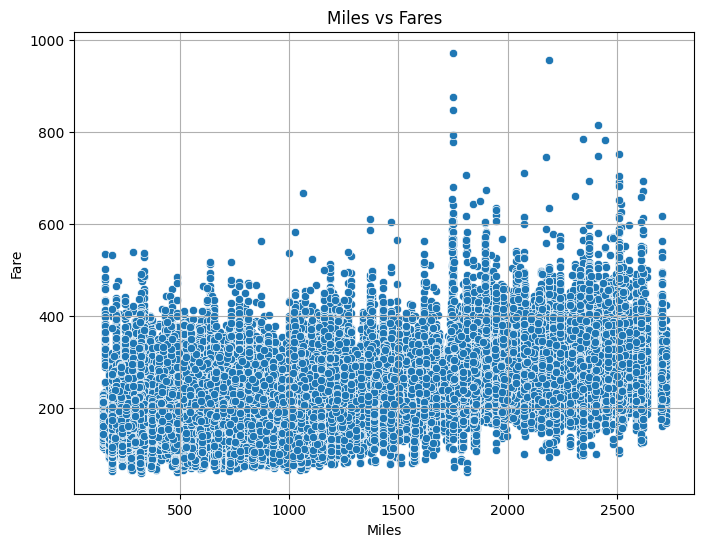

In [640]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Miles', y='Fare', data=df)
plt.title('Miles vs Fares')
plt.grid(True)
plt.show()

- Plot a box plot to see the median price distribution per Year

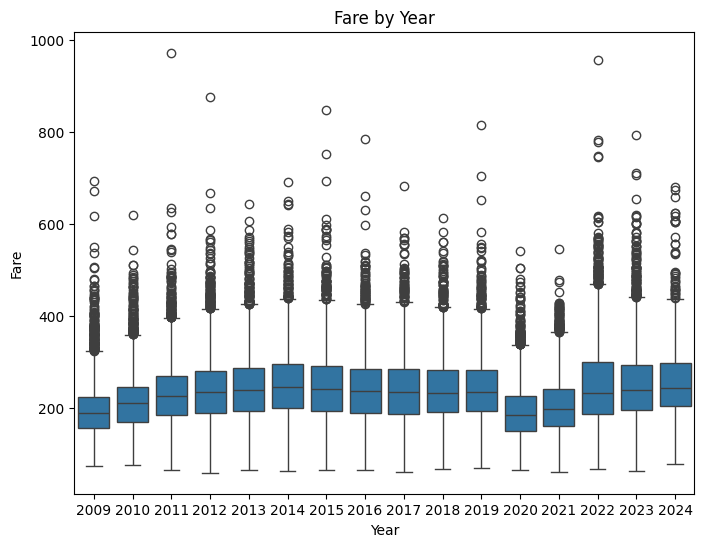

In [641]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='Fare', data=df)
plt.title('Fare by Year')
plt.show()

- Plot a line plot to see clearer average pricing trend quarterly per year

C:\Users\hoang\AppData\Local\Temp\ipykernel_17084\4062398184.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Year'].astype(str) + 'Q' + df['Quarter'].astype(str))


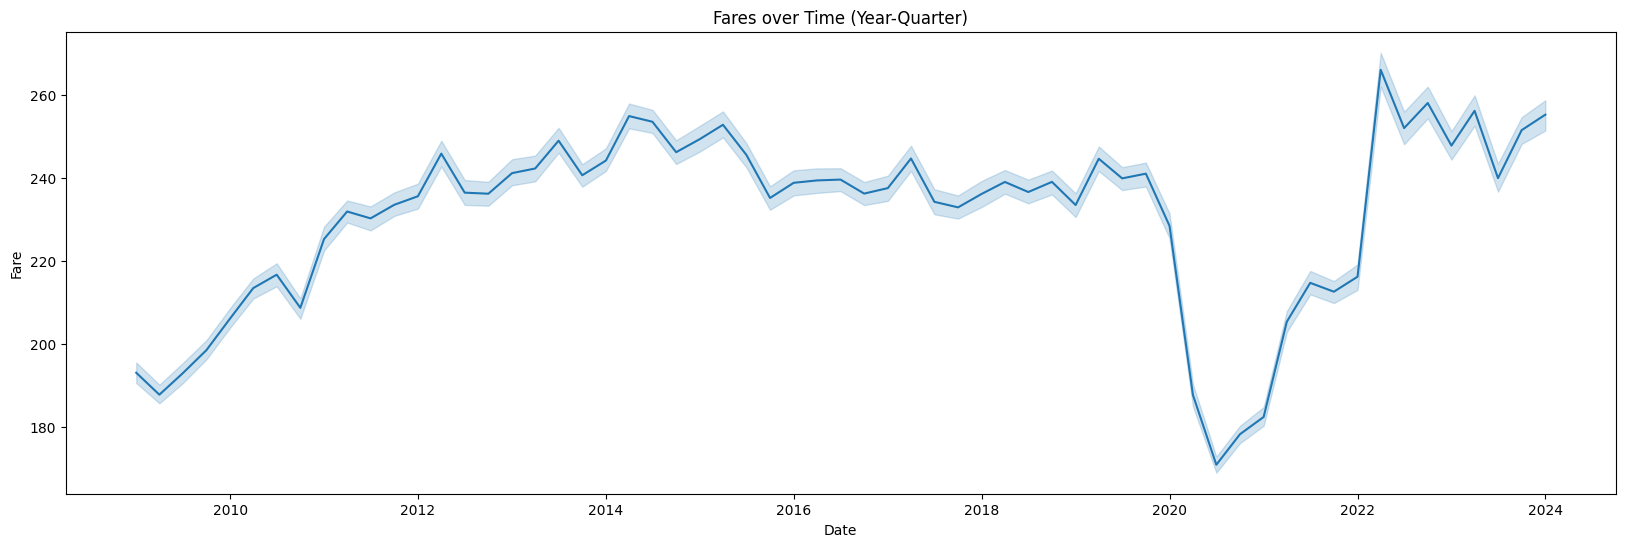

In [642]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + 'Q' + df['Quarter'].astype(str))

plt.figure(figsize=(20, 6))
sns.lineplot(x='Date', y='Fare', data=df)
plt.title('Fares over Time (Year-Quarter)')
plt.show()
df.drop(columns=['Date'], inplace=True)

- Plot a scatter plot to see the relationship of prices over passenger

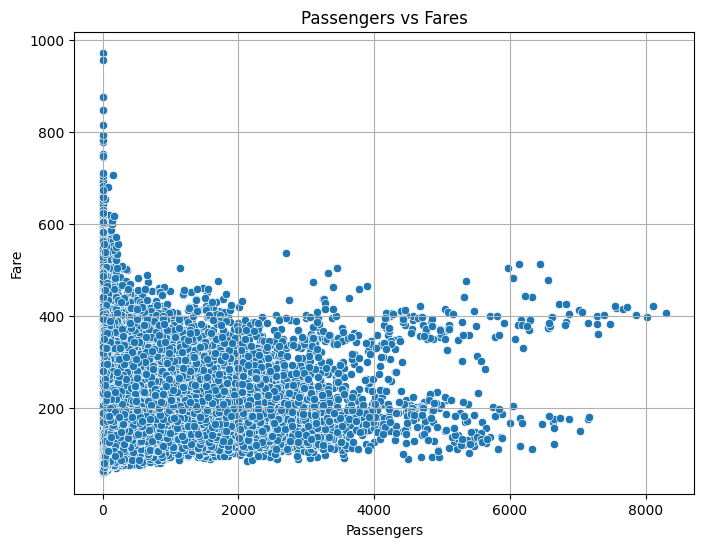

In [643]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Passengers', y='Fare', data=df)
plt.title('Passengers vs Fares')
plt.grid(True)
plt.show()

- Through this scatter plot and the above boxplot of fares, we know that these outliners will affect the result of our models performance, so we will delete all of these outliners from each year

In [644]:
def remove_outliers(data):
    Q1 = data['Fare'].quantile(0.25)
    Q3 = data['Fare'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]

for i in range(5):
    df = df.groupby('Year').apply(remove_outliers).reset_index(drop=True)
df


C:\Users\hoang\AppData\Local\Temp\ipykernel_17084\1090449119.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Year').apply(remove_outliers).reset_index(drop=True)
C:\Users\hoang\AppData\Local\Temp\ipykernel_17084\1090449119.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Year').apply(remove_outliers).reset_index(drop=True)
C:\Users\hoang\AppData\Local\Temp\ipykerne

,Year,Quarter,Miles,Passengers,Fare,RouteEncoded,TotalDomesticPassenger,TotalDomesticFlight,TotalDomesticRevenue,FuelCostPerGallon,US_GDP,Inflation
0,2009,1,647,892,159.02,173,47343477.0,705731.7,41152660.7,1.7,14478067.0,212.4
1,2009,1,2401,104,216.30,760,47343477.0,705731.7,41152660.7,1.7,14478067.0,212.4
2,2009,1,551,545,115.57,34,47343477.0,705731.7,41152660.7,1.7,14478067.0,212.4
3,2009,1,324,375,104.78,110,47343477.0,705731.7,41152660.7,1.7,14478067.0,212.4
4,2009,1,802,1768,200.97,354,47343477.0,705731.7,41152660.7,1.7,14478067.0,212.4
...,...,...,...,...,...,...,...,...,...,...,...,...
118698,2024,1,665,207,278.70,918,71238211.7,675243.0,67326311.3,2.8,28977762.0,309.7
118699,2024,1,724,277,148.69,919,71238211.7,675243.0,67326311.3,2.8,28977762.0,309.7
118700,2024,1,724,70,330.19,919,71238211.7,675243.0,67326311.3,2.8,28977762.0,309.7
118701,2024,1,550,178,95.65,921,71238211.7,675243.0,67326311.3,2.8,28977762.0,309.7


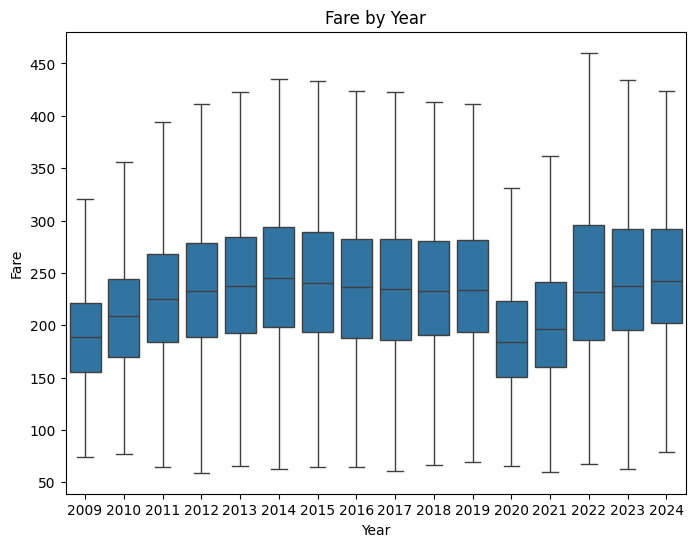

In [645]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='Fare', data=df)
plt.title('Fare by Year')
plt.show()

 - Plot a correlation matrix heatmap to have an insight of relationships between columns

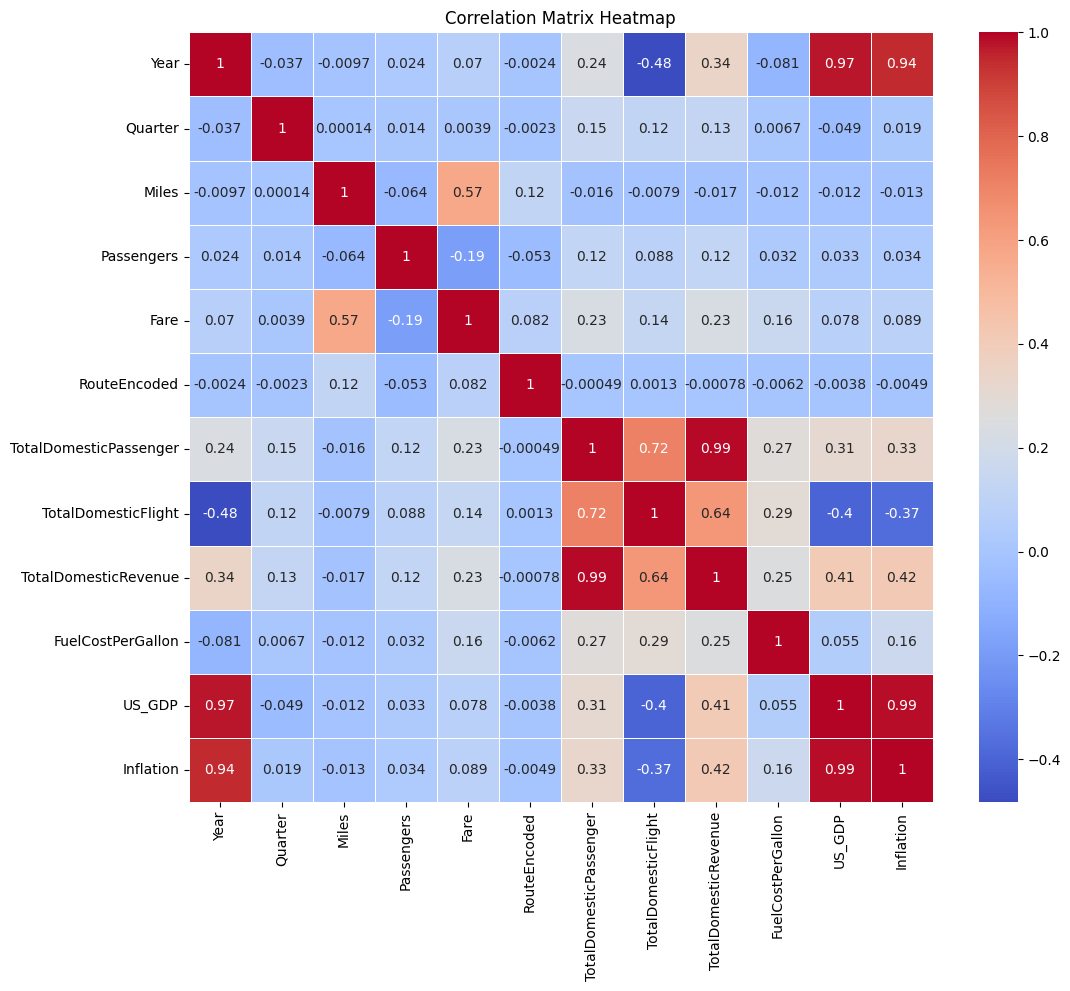

In [646]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

- With this correlation matrix, we can see that the most important factor is distance (miles). Although the Other factors like route may also contributes to the price, but it cannot be shown in the correlation matrix

## Predicting the flight prices in the next 5 years with Random Forest

### Train Random Forest Regressor

In [647]:
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [648]:
X = df[['Year', 'Miles', 'Passengers', 'RouteEncoded', 'TotalDomesticRevenue', 'FuelCostPerGallon', 'US_GDP', 'Inflation']]
y = df['Fare']

In [649]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [650]:
model = RandomForestRegressor(n_jobs=-1)

model.fit(X_train, y_train)

importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
print(feature_importance)

                Feature  Importance
0                  Year    0.017551
1                 Miles    0.460303
2            Passengers    0.176460
3          RouteEncoded    0.143148
4  TotalDomesticRevenue    0.092542
5     FuelCostPerGallon    0.038610
6                US_GDP    0.016264
7             Inflation    0.055121


In [651]:
model.score(X_test, y_test)

0.7802512006150663

- Evaluate the accuracy of the models

In [652]:
y_pred = model.predict(X_test)

print(f"R2: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred))}")

R2: 0.7802512006150663
MAE: 21.702621708664008
MSE: 931.778383817024
RMSE: 30.525045189434593


- Visualise the accuracy between predicted flight price and actual flight price

Text(0.5, 1.0, 'Prediction vs Actual Price')

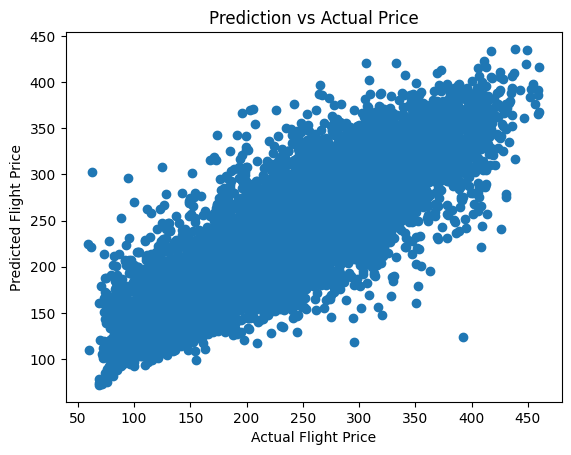

In [653]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Price')

## Clustering similar flights based on fare, distance, route, and passengers 

In [681]:
from sklearn.cluster import KMeans

features = df[['Fare', 'Miles', 'RouteEncoded', 'Passengers']]


In [684]:
model = KMeans(n_clusters=7, random_state=42)
model.fit(features)

all_predictions = model.predict(features)

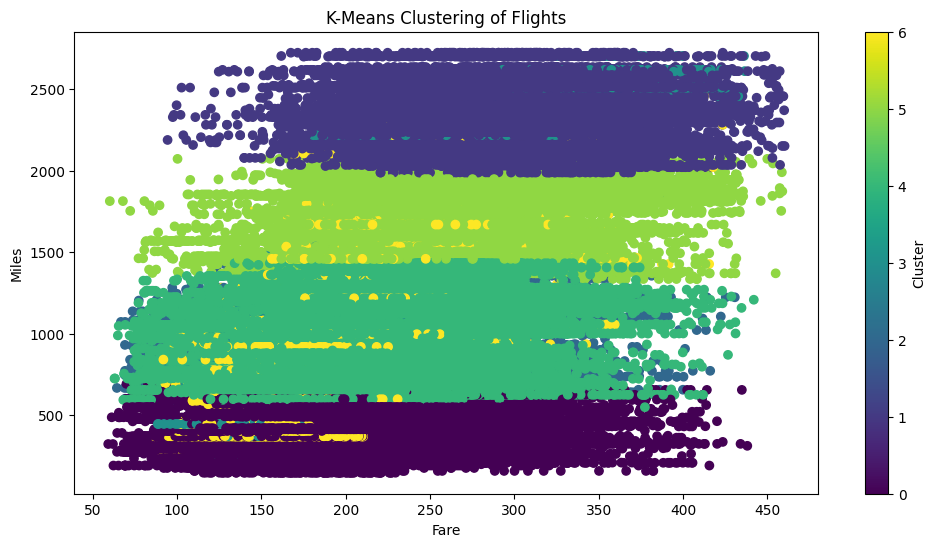

In [685]:
# Plot clustering results
plt.figure(figsize=(12, 6))
plt.scatter(df['Fare'], df['Miles'], c=all_predictions, marker='o')
plt.title('K-Means Clustering of Flights')
plt.xlabel('Fare')
plt.ylabel('Miles')
plt.colorbar(label='Cluster')
plt.show()

In [657]:
predicted_label = model.predict([[3, 2, 3, 2]])
print(f'The predicted cluster for the sample [6.3, 3.3, 6, 2.5] is: {predicted_label[0]}')

The predicted cluster for the sample [6.3, 3.3, 6, 2.5] is: 5


c:\Users\hoang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


## Classify flight prices on each route

- We will label the quartile 1 as low price, and quartile 4 as high price in each route

In [658]:
def categorize_price(data, Q1, Q3):
    if data['Fare'] <= Q1:
        return 'Low'
    elif data['Fare'] >= Q3:
        return 'High'
    else:
        return 'Medium'
            
def categorize_prices_per_route(df):
    price_categories = []

    for route, data in df.groupby('RouteEncoded'):
        Q1 = data['Fare'].quantile(0.25)
        Q3 = data['Fare'].quantile(0.75)

        data['PriceCategory'] = data.apply(categorize_price, args=(Q1, Q3), axis=1)
        price_categories.append(data)

    return pd.concat(price_categories).reset_index(drop=True)

df = categorize_prices_per_route(df)
df

,Year,Quarter,Miles,Passengers,Fare,RouteEncoded,TotalDomesticPassenger,TotalDomesticFlight,TotalDomesticRevenue,FuelCostPerGallon,US_GDP,Inflation,PriceCategory
0,2020,1,970,126,89.54,0,51968218.7,658991.0,48497508.7,1.7,21322950.0,258.8,Low
1,2020,1,970,20,240.24,0,51968218.7,658991.0,48497508.7,1.7,21322950.0,258.8,Medium
2,2020,2,970,34,83.27,0,9593993.3,247582.7,8225514.0,1.2,21322950.0,256.3,Low
3,2020,2,970,5,183.69,0,9593993.3,247582.7,8225514.0,1.2,21322950.0,256.3,Medium
4,2021,2,970,168,90.44,0,52219860.3,565930.3,49446075.7,1.9,23594031.0,268.6,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118698,2023,3,550,41,337.39,921,71238211.7,675243.0,67326311.3,2.8,27360935.0,305.5,High
118699,2023,4,550,237,92.75,921,71238211.7,675243.0,67326311.3,3.0,27360935.0,307.6,Medium
118700,2023,4,550,58,350.81,921,71238211.7,675243.0,67326311.3,3.0,27360935.0,307.6,High
118701,2024,1,550,178,95.65,921,71238211.7,675243.0,67326311.3,2.8,28977762.0,309.7,Medium


- Import necessary libraries for LightGBM model

In [659]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

- Encoding this pricing labels to numerical

In [660]:
df['PriceCategory'] = df['PriceCategory'].map({'Low': 0, 'Medium': 1, 'High': 2})

- Selecting key features for the classification training

In [661]:
X = df.drop('PriceCategory', axis=1) 
y = df['PriceCategory']            

- We will use 80% of data for training, and 20% of data for testing

In [662]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Use LightGBM classifier to train 

In [663]:
model = lgb.LGBMClassifier(random_state=42)

model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 94962, number of used features: 12
[LightGBM] [Info] Start training from score -1.373383
[LightGBM] [Info] Start training from score -0.703414
[LightGBM] [Info] Start training from score -1.378887


LGBMClassifier(random_state=42)

- Make predictions and evaluate the result

In [664]:
y_pred = model.predict(X_test)

- Use confusion matrix to have a detailed breakdown of the true positives, true negatives, false positives, and false negatives

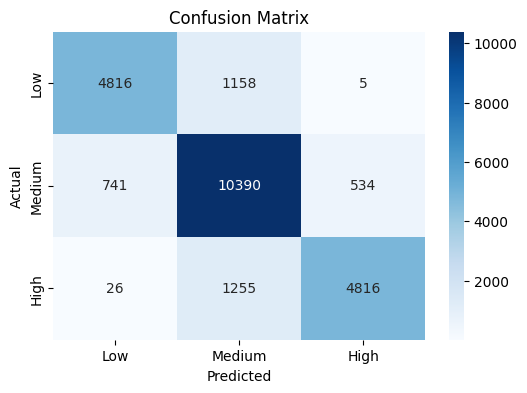

In [665]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- Use precision, recall, and F1-score to evaluate the model performance

In [666]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      5979
           1       0.81      0.89      0.85     11665
           2       0.90      0.79      0.84      6097

    accuracy                           0.84     23741
   macro avg       0.86      0.83      0.84     23741
weighted avg       0.85      0.84      0.84     23741



- Perform cross-validation by splitting the dataset into multiple train/test splits and averaging the results.

In [667]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1312
[LightGBM] [Info] Number of data points in the train set: 94962, number of used features: 12
[LightGBM] [Info] Start training from score -1.374507
[LightGBM] [Info] Start training from score -0.704841
[LightGBM] [Info] Start training from score -1.374965
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1310
[LightGBM] [Info] Number of data points in the train set: 94962, number of used features: 12
[LightGBM] [Info] Start training from score -1.374507
[LightGBM] [Info] Start training from score -0.704841
[LightGBM] [Info] Start 

- We can see that with cross validation result, there's a need for hyper-tuning of the model

In [668]:
model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=70,
    max_depth=-1,           
    learning_rate=0.01,
    n_estimators=500,  
    subsample=0.5,
    colsample_bytree=0.5
)

X = df[['Year', 'Miles', 'Passengers', 'RouteEncoded', 'Fare', 'US_GDP', 'Inflation']]
y = df['PriceCategory']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1108
[LightGBM] [Info] Number of data points in the train set: 94962, number of used features: 7
[LightGBM] [Info] Start training from score -1.373383
[LightGBM] [Info] Start training from score -0.703414
[LightGBM] [Info] Start training from score -1.378887


LGBMClassifier(colsample_bytree=0.5, learning_rate=0.01, n_estimators=500,
               num_leaves=70, subsample=0.5)

- Make prediction again

In [669]:
y_pred = model.predict(X_test)

- Then we re-evaluate if the hyper-tuning returns better results

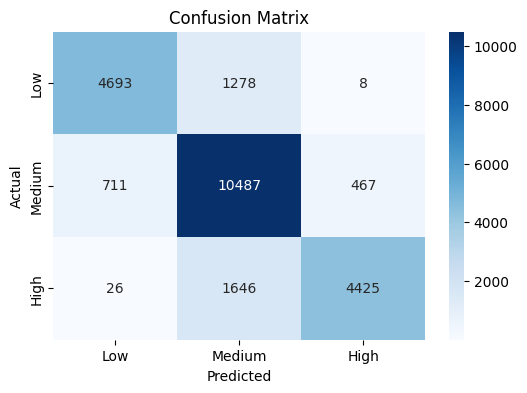

In [670]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [671]:

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.86      0.78      0.82      5979
           1       0.78      0.90      0.84     11665
           2       0.90      0.73      0.80      6097

    accuracy                           0.83     23741
   macro avg       0.85      0.80      0.82     23741
weighted avg       0.83      0.83      0.82     23741



In [672]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1105
[LightGBM] [Info] Number of data points in the train set: 94962, number of used features: 7
[LightGBM] [Info] Start training from score -1.374507
[LightGBM] [Info] Start training from score -0.704841
[LightGBM] [Info] Start training from score -1.374965
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1103
[LightGBM] [Info] Number of data points in the train set: 94962, number of used features: 7
[LightGBM] [Info] Start training from score -1.374507
[LightGBM] [Info] Start training from score -0.704841
[LightGBM] [Info] Start training from score -1.374965
[LightGBM] [Info] Auto-choosing row-

In [673]:
from sklearn.metrics import log_loss

# Predicted probabilities for each class
y_prob = model.predict_proba(X_test)

# Calculate Log Loss
logloss = log_loss(y_test, y_prob)
print(f"Log Loss: {logloss:.2f}")

Log Loss: 0.47
